<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Exploration/%5BE-03%5D%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D_%EB%B0%8F_%EC%8A%A4%ED%8B%B0%EC%BB%A4%EB%B6%99%EC%9D%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 스티커 이미지 가져오기
!wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
!wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png

--2021-07-20 00:50:14--  https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511 (13K) [image/png]
Saving to: ‘king.png’

king.png            100%[===================>]  13.19K  --.-KB/s    in 0s      

2021-07-20 00:50:15 (198 MB/s) - ‘king.png’ saved [13511/13511]

--2021-07-20 00:50:15--  https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42963 (42K) [image/png]
Saving to: ‘h

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

 matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다. 그래서 여러분의 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것

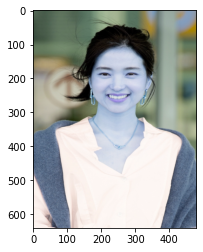

In [ ]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image.jpg'
img_bgr = cv2.imread(my_image_path)          #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480, 640))    # Resize
img_show = img_bgr.copy()                    #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

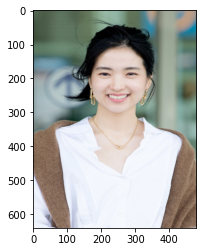

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꿔야 한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

cv.imread()의 flag 3가지

문서에 따르면 이미지 읽기의 flag는 다음 3가지가 있습니다. 순서대로 1, 0, -1의 값을 갖습니다.

cv2.IMREAD_COLOR : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.

cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.

cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다.

cv2.imread('img.png', 0)이라고 호출했다면 이미지를 Grayscale로 읽어 들이겠다는 뜻입니다. 실제로 이미지 읽기 flag를 바꿔가면서 이미지가 어떻게 출력되는지 확인해 보세요.

dlib 의 face detector는 HOG(Histogram of Oriented Gradient) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다.

[딥러닝(Deep Learning)을 사용한 최신 얼굴 인식(Face Recognition)](https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c)

이미지에서 그래디언트(gradient)를 특징(feature)으로 사용하는 이유
- 픽셀의 RGB값 자체보다는 인접한 픽셀들 사이의 색상 변화율 자체에 오브젝트의 특징이 더욱 정확히 반영될 때가 많기 때문이다

단일 픽셀의 그래디언트를 사용하지 않고 16x16 의 정사각형을 이용하는 이유
- 단일 픽셀의 그래디언트만 다루면 너무 자세하여 나무만 보고 숲을 보지 못하게 될 수가 있다. 이미지의 기본 패턴을 알려면 픽셀보다는 높은 수준에서의 밝음/어둠의 기본 흐름을 보는 것이 더 좋기 때문이다.

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주었습니다.

동일 이미지의 서로 다른 사이즈의 set을 Image Pyramids라고 합니다.(가장 아래에 가장 큰 해상도를 놓고 점점 줄여가면서 쌓아가는 형태) 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다. 
[Image Pyramids](https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html)

In [ ]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)                 # (image, num of img pyramid)

dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다.

dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.

dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함하고 있습니다
[Classes - dlib documentation](http://dlib.net/python/index.html#dlib.rectangles)

rectangles[[(167, 150) (322, 305)]]


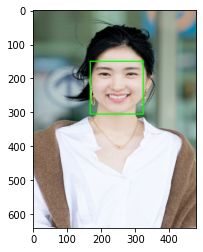

In [ ]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 합니다.


Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.
1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

이번 예제에서는 1번 방식을 다룹니다.

Dlib은 ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공합니다. 학습 알고리즘은 regression tree의 앙상블 모델을 사용 했습니다.

Dlib의 제공되는 모델을 사용해보겠습니다

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-20 01:32:02--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  20.2MB/s    in 3.0s    

2021-07-20 01:32:05 (20.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)         # landmark 모델을 불러옴

In [ ]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)          # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다. 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

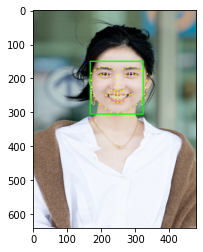

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 씌우면 될 것 같습니다.
중요한 것은 얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산을 해줘야 합니다.
계산할 수치는 두 가지 입니다.

1. 스티커 위치

2. 스티커 크기

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(246, 231)
(x,y) : (246,153)
(w,h) : (156,156)


왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize 합니다.

In [ ]:
sticker_path = '/content/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.

In [ ]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (168,-3)



y축 좌표의 값이 음수가 계산 되었습니다.
스티커가 이미지범위를 벗어남

opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다. ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다. 따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거해 주어야 합니다.

In [ ]:
img_sticker = img_sticker[-refined_y:]    # -y 크기만큼 스티커를 crop 합니다.
print (img_sticker.shape)

refined_y = 0              # top 의 y 좌표는 원본 이미지의 경계 값으로 수정합니다.
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(153, 156, 3)
(x,y) : (168,0)


원본 이미지에 스티커를 적용합니다.

sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다. 예제에서는 (566,0) 부터 (566+268, 0+157) 범위의 이미지를 의미합니다.

스티커 이미지에서 사용할 부분은 0 이 아닌 색이 있는 부분을 사용합니다. 따라서 np.where를 통해 img_sticker 가 0 인 부분은 sticker_area를 사용하고 0이 아닌 부분을 img_sticker를 사용하시면 됩니다. img_show 에 다시 적용하겠습니다.

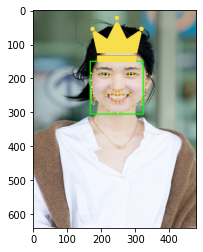

In [ ]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것입니다.

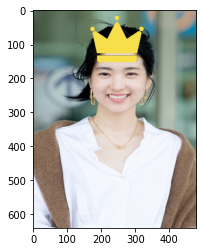

In [ ]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()